In [ ]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Utilisation de la base de donnees fashonMnist**

In [ ]:
(all_x_train, all_y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

## converstion des donnees en types float

In [ ]:
all_x_train = all_x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
all_x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## separation des donnees pour la validation

In [ ]:
x_val, x_train = all_x_train[: 5000] / 255.0, all_x_train[5000 :] / 255.0
y_val, y_train = all_y_train[: 5000], all_y_train[5000 :]

y_val.shape, y_train.shape, x_val.shape, x_train.shape

((5000,), (55000,), (5000, 28, 28), (55000, 28, 28))

Les classes d'images

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
for cls in range(10):
  print(cls, "==>", class_names[y_train[cls]])


0 ==> Coat
1 ==> T-shirt/top
2 ==> Sneaker
3 ==> Ankle boot
4 ==> Ankle boot
5 ==> Ankle boot
6 ==> Coat
7 ==> Coat
8 ==> Dress
9 ==> Coat


## **Visualisation des images**

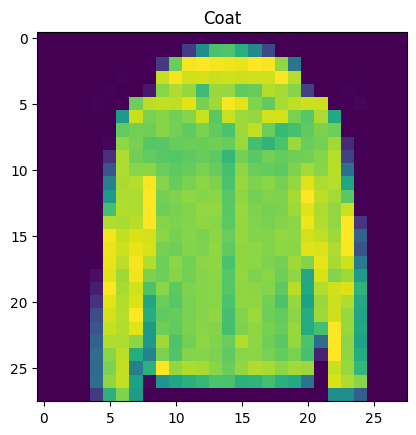

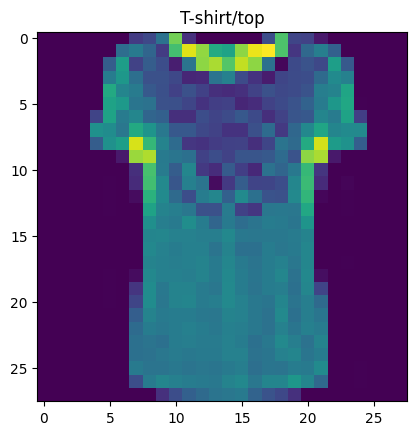

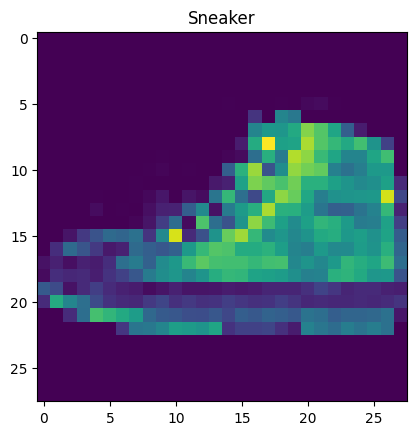

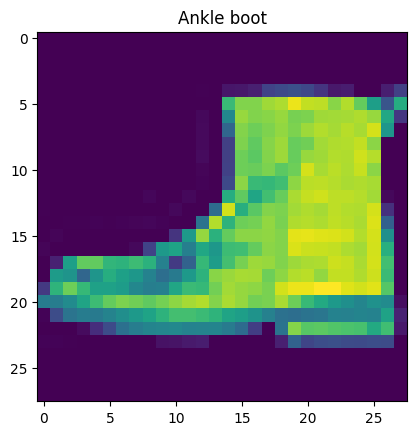

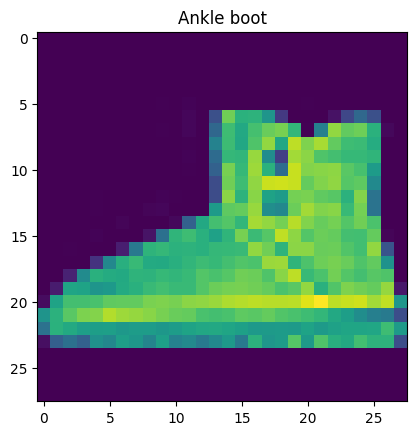

In [ ]:
for i in range(5):
  my_img = x_train[i]
  my_class = y_train[i]
  etiquete = class_names[my_class]
  plt.imshow(my_img)
  plt.title(etiquete)
  plt.show()

## **Modele MLP : perceptron**

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(300, 'relu'))
model.add(keras.layers.Dense(150, 'relu'))
model.add(keras.layers.Dense(10, 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,160 (1.08 MB)

 Trainable params: 282,160 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers[2].name

'dense_1'

In [ ]:
#layers_infos

info_layers = model.get_layer("dense_1")
poids, biais = info_layers.get_weights()
print("\n")
print(poids, "\n")
print(biais)



[[ 0.11435646 -0.03125452 -0.08624373 ... -0.02948523 -0.02226018
   0.03045994]
 [-0.05340659  0.01009376 -0.05053236 ...  0.11524527 -0.04774583
   0.10231142]
 [ 0.09636872 -0.07626151  0.02515292 ...  0.05232328 -0.00830911
  -0.05794062]
 ...
 [-0.01302093  0.01293677 -0.04518772 ...  0.04748829 -0.08458411
  -0.02575561]
 [-0.00039701 -0.07357726 -0.11133975 ...  0.05111794 -0.10189722
   0.10633649]
 [ 0.08689943 -0.09440199  0.01849215 ... -0.03118115  0.07293729
  -0.00165416]] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


## **Initialisation des poids 2**

In [ ]:
model_1 = keras.models.Sequential()
model_1.add(keras.layers.Input(shape=(28,28)))
model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(300, 'relu'))
my_weights_initializer = keras.initializers.RandomNormal(mean=100. , stddev=1.)
my_biais_initializer = keras.initializers.ones()
model_1.add(keras.layers.Dense(150, 'relu',\
            kernel_initializer = my_weights_initializer,\
            bias_initializer = my_biais_initializer))
model_1.add(keras.layers.Dense(10, 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,160 (1.08 MB)

 Trainable params: 282,160 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

**visualisation des poids de la couche dense_4**

In [ ]:
model_1.layers[2].name

'dense_4'

In [ ]:
layer_info_1 = model_1.get_layer("dense_4")
poids, biais = layer_info_1.get_weights()
print("Poids : \n")
print(poids, poids.shape,"\n")
print("biais : \n")
print(biais, biais.shape)


Poids : 

[[102.12825   98.93319   99.21333  ... 101.718414 100.34887  100.41338 ]
 [100.36209   99.91147  101.396706 ...  99.316795  99.02994   99.21956 ]
 [101.99576   99.341934 100.16514  ...  99.00637  100.604004 100.95873 ]
 ...
 [100.4066   101.20629  100.08451  ... 101.46533   98.690155 101.7628  ]
 [101.54362   99.17917  101.91696  ... 100.282646  99.03765  101.03643 ]
 [ 99.66621   99.83146  100.74685  ... 101.31197   99.42473  100.877556]] (300, 150) 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.] (150,)


## **Compilation du modele**

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.sparse_categorical_crossentropy,\
              metrics =['accuracy'])

## **Entrainement du Modele**

In [ ]:
result = model.fit(x_train, y_train, epochs=10,\
          validation_data=(x_val, y_val))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6732 - loss: 1.0144 - val_accuracy: 0.8260 - val_loss: 0.5149
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8244 - loss: 0.5027 - val_accuracy: 0.8490 - val_loss: 0.4411
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8425 - loss: 0.4531 - val_accuracy: 0.8582 - val_loss: 0.4098
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8506 - loss: 0.4227 - val_accuracy: 0.8618 - val_loss: 0.4042
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8583 - loss: 0.4037 - val_accuracy: 0.8684 - val_loss: 0.3885
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8664 - loss: 0.3821 - val_accuracy: 0.8700 - val_loss: 0.3770
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8699 - loss: 0.3711 - val_accuracy: 0.8726 - val_loss: 0.3736
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8747 - loss: 0.3546 

## **Desequilibre des donnees**

In [ ]:
result = model.fit(x_train, y_train, epochs=10,\
          validation_data=(x_val, y_val),\
                   class_weight=[10,10,10,5,10,10,10,10,5, 10])

## **incoherence des donnees**

In [ ]:
result = model.fit(x_train, y_train, epochs=10,\
          validation_data=(x_val, y_val),\
                   sample_weight=[])

## **Visualisation des resultats**

In [ ]:
results = model.fit(x_train, y_train, epochs=40,\
          validation_data=(x_val, y_val))

Epoch 1/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8847 - loss: 0.3244 - val_accuracy: 0.8810 - val_loss: 0.3401
Epoch 2/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8862 - loss: 0.3206 - val_accuracy: 0.8784 - val_loss: 0.3420
Epoch 3/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8871 - loss: 0.3162 - val_accuracy: 0.8784 - val_loss: 0.3442
Epoch 4/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8904 - loss: 0.3076 - val_accuracy: 0.8836 - val_loss: 0.3245
Epoch 5/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8935 - loss: 0.2974 - val_accuracy: 0.8866 - val_loss: 0.3229
Epoch 6/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8944 - loss: 0.2911 - val_accuracy: 0.8860 - val_loss: 0.3208
Epoch 7/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8961 - loss: 0.2866 - val_accuracy: 0.8878 - val_loss: 0.3139
Epoch 8/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8983 - loss: 0.28

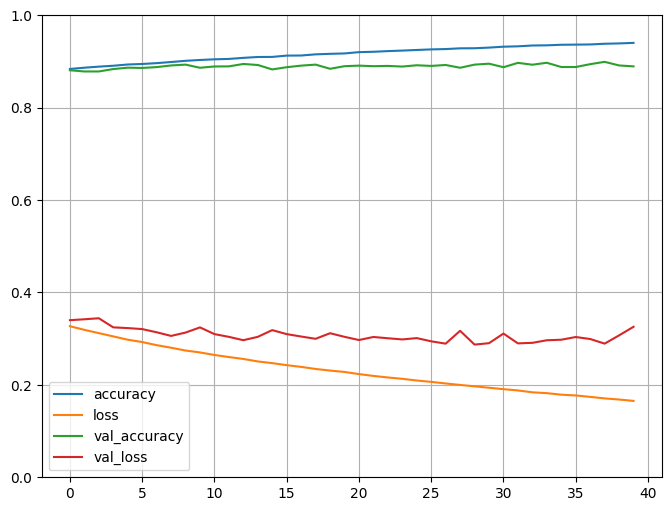

In [ ]:
pd.DataFrame(results.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## **Evaluation**

In [ ]:
x_test = x_test/ 255.0

model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8850 - loss: 0.3538


[0.3548286259174347, 0.8834999799728394]

## **Probabilite des predictions de nos images**

In [ ]:
x_new = x_test[11:20]

# Prédiction des probabilités
y_prob = model.predict(x_new)
print("probability ==> ", y_prob.round(2), "\n")

# Prédiction des classes
y_predict_class = np.argmax(y_prob, axis=1)
print(y_predict_class, "\n")

# Affichage des prédictions avec les noms de classes
print(f"predictions : {np.array(class_names)[y_predict_class]}")

# Affichage des classes réelles
y_new = y_test[11:20]
print(f"réel : {np.array(class_names)[y_new]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
probability ==>  [[0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.49 0.   0.46 0.05 0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.73 0.   0.01 0.   0.01 0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.98 0.   0.01 0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.96 0.   0.   0.01 0.   0.   0.03 0.   0.   0.  ]] 

[5 5 3 4 1 2 2 8 0] 

predictions : ['Sandal' 'Sandal' 'Dress' 'Coat' 'Trouser' 'Pullover' 'Pullover' 'Bag'
 'T-shirt/top']
réel : ['Sandal' 'Sneaker' 'Dress' 'Coat' 'Trouser' 'Pullover' 'Coat' 'Bag'
 'T-shirt/top']


In [ ]:
!git clone https://github.com/Malanda-juste/Tensorflow.git


Cloning into 'Tensorflow'...


mv: cannot stat 'FashonMnist.ipynb': No such file or directory
